In [19]:
import numpy as np

from sklearn.metrics import mean_squared_error
from neuralregressionnetwork import NeuralRegressionNetwork
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [20]:
import pandas as pd

df_train = pd.read_table("sincTrain25.dt",header=None, delimiter=" ")
x_train = df_train[0].to_numpy()
y_train = df_train[1].to_numpy()

df_test = pd.read_table("sincValidate10.dt",header=None,delimiter=" ")
x_test = df_test[0].to_numpy()
y_test = df_test[1].to_numpy()

nn2 = NeuralRegressionNetwork(no_of_neurons=[10,10,10])
ls2, es, gs = nn2.train(x_train,y_train,"test",0.0001,x_val=x_test,y_val=y_test)

4


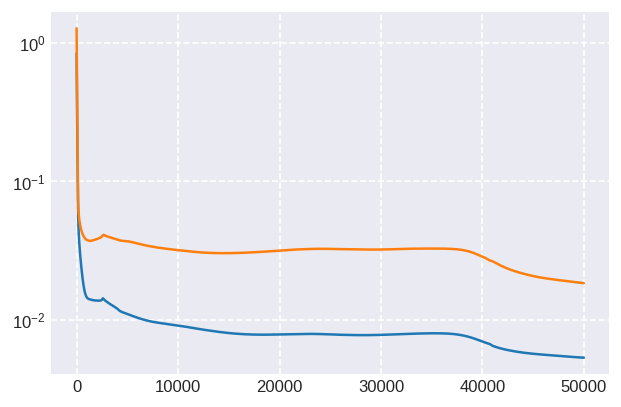

In [21]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.grid(linestyle='--', linewidth=1)
ax.plot(range(len(ls2)),np.array(ls2))
ax.plot(range(len(es)),np.array(es))
fig.savefig('prediction-01-l.jpg')

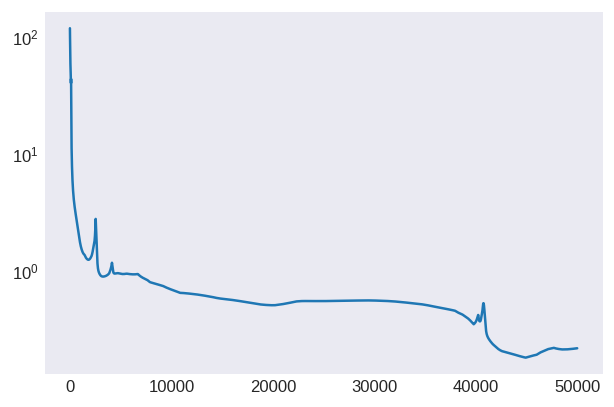

In [22]:
fig, ax = plt.subplots(dpi=120)
ax.set_yscale('log')
ax.plot(range(len(gs)),gs)
fig.savefig('prediction-01-g.jpg')

<ipython-input-23-29c3558e2846>:6: RuntimeWarning: invalid value encountered in true_divide
  y_real = np.sin(x_lin)/x_lin


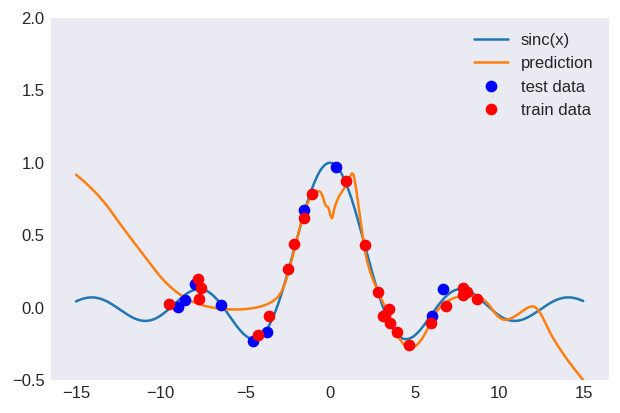

In [23]:
x_lin = range(-1500,1500,5)
x_lin = np.array(x_lin) / 100
x = np.reshape(x_lin, (-1,1)).T
_, a_s = nn2.feedForward(x)
y_pred = np.reshape(a_s[len(a_s) - 1], -1)
y_real = np.sin(x_lin)/x_lin

fig, ax = plt.subplots(dpi=120)
ax.set_ylim(-0.5,2)
ax.plot(x_lin, y_real, label='sinc(x)')
ax.plot(x_lin, y_pred, label='prediction')
ax.plot(x_test, y_test, 'bo', label='test data')
ax.plot(x_train, y_train, 'ro', label='train data')
ax.plot()
ax.legend()
fig.savefig("prediction-01.jpg")

MSE with NN:  0.01841540375482309
MSE with Interpolation:  49.84395496458481


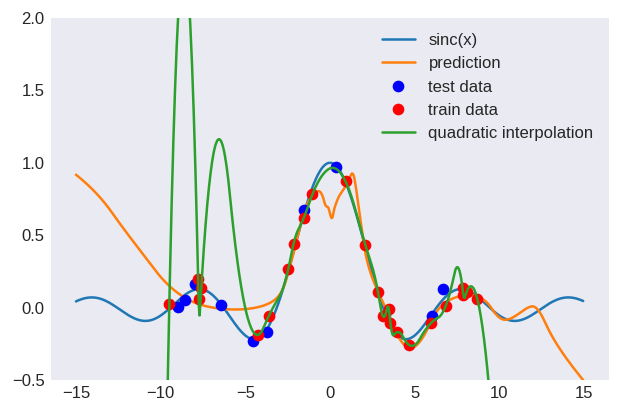

In [24]:
# interpolation using scikit
from scipy.interpolate import interp1d
interpolation = interp1d(x_train,y_train,kind='quadratic',fill_value='extrapolate')
ax.plot(x_lin, interpolation(x_lin), label='quadratic interpolation')
print("MSE with NN: ",1 - nn2.score(x_test,y_test))
print("MSE with Interpolation: ", mean_squared_error(x_test,interpolation(x_test)))
ax.legend()
fig